# IBM Machin Learning Capstone Project

This Notebook is used to complete the *Capstone Project*. Project includes data evaluation, model building and predictions.

In [1]:
# importing required libraries for data evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import types
from botocore.client import Config
import ibm_boto3
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Introduction/Business Problem Statement

In this project, a public data set is used to demonstrate Data Analysis and Machine Learning skills obtained in the IBM Data Science Program. Coursera has provided the data set which includes records of accidents and their severity level. The objective of this project is to: understand the data, define relevant attributes that cause the accident and build a predictive model. This analysis will help in potential driving hazard identification and can help drivers choose the best rout based on weather and road condition.

# Data

The collision data set provided by Coursera includes all collision reports in Seattle since 2004. The data set has 194673 records and 37 attributes, each record is labelled by the accident's severity level. Code below loads the data into Pandas dataframe for further evaluation. After proper data evaluation and plotting, 10 features were finalized for modeling purposes. Therefore the effect of Address Type, Collision Type, Weather Condition, Road Condition, Light Condition, Speed Violation, Number of Pedestrians, Vehicles, Cyclists and Total Number of People Involved in the Accident were used to estimate severity of accidents.

In [3]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Methodology

## Exploratory Data Analysis

Before the modeling process, it is important to investigate the data. This means finding a better understanding of the data as well as cleaning the data set based on the results.

In [4]:
# This code is to check the attributes and their data type.
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [5]:
# check for possible duplications
df_col.duplicated().sum()

0

In [6]:
# Look at the column titles.
df_col.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
# size of the data frame
df_col.shape

(194673, 38)

In [8]:
# Numner of missing data at each column
df_col.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

Based on the results above, columns that carry irrelevant data to the accident severity and those which have a lot of missing data are eliminated. This way a more reliable model can be built based on relevant data.

In [9]:
df_col.drop(['X','Y','OBJECTID','INCKEY','COLDETKEY', 'REPORTNO', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'SDOT_COLCODE', 'SDOT_COLDESC', \
            'PEDROWNOTGRNT', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'SEVERITYCODE.1', 'INATTENTIONIND', 'JUNCTIONTYPE', \
            'LOCATION', 'INCDATE', 'INCDTTM', 'SDOTCOLNUM', 'STATUS', 'UNDERINFL', 'INTKEY', 'ST_COLCODE'], axis=1, inplace=True)

In [10]:
# dataframe after filtering unnecessary columns.
df_col.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,Angles,2,0,0,2,Overcast,Wet,Daylight,NaN
1,1,Block,Sideswipe,2,0,0,2,Raining,Wet,Dark - Street Lights On,NaN
2,1,Block,Parked Car,4,0,0,3,Overcast,Dry,Daylight,NaN
3,1,Block,Other,3,0,0,3,Clear,Dry,Daylight,NaN
4,2,Intersection,Angles,2,0,0,2,Raining,Wet,Daylight,NaN


Now that dataframe has gone through priliminary filtering, more in depth evaluations can be perfomed.

In [11]:
# Statistical description of numerical data in the filtered dataframe.
df_col.describe(include= [np.number])

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,1.298901,2.444427,0.037139,0.028391,1.920780
std,0.457778,1.345929,0.198150,0.167413,0.631047
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,2.000000
50%,1.000000,2.000000,0.000000,0.000000,2.000000
75%,2.000000,3.000000,0.000000,0.000000,2.000000
max,2.000000,81.000000,6.000000,2.000000,12.000000


In [12]:
# Statistical description of the object type data in the dataframe.
df_col.describe(include= ['O'])

,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
count,192747,189769,189592,189661,189503,9333
unique,3,10,11,9,9,1
top,Block,Parked Car,Clear,Dry,Daylight,Y
freq,126926,47987,111135,124510,116137,9333


In [13]:
# total number of accidents for each seerity code.
df_col['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [14]:
# distribution of accidents based on the severity code at each address type.
df_col.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

SEVERITYCODE
ADDRTYPE     SEVERITYCODE              
Alley        1                 0.890812
             2                 0.109188
Block        1                 0.762885
             2                 0.237115
Intersection 1                 0.572476
             2                 0.427524

In [15]:
# distribution of accidents based on the severity code at different weather condition.
df_col.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

SEVERITYCODE
WEATHER                  SEVERITYCODE              
Blowing Sand/Dirt        1                 0.732143
                         2                 0.267857
Clear                    1                 0.677509
                         2                 0.322491
Fog/Smog/Smoke           1                 0.671353
                         2                 0.328647
Other                    1                 0.860577
                         2                 0.139423
Overcast                 1                 0.684456
                         2                 0.315544
Partly Cloudy            2                 0.600000
                         1                 0.400000
Raining                  1                 0.662815
                         2                 0.337185
Severe Crosswind         1                 0.720000
                         2                 0.280000
Sleet/Hail/Freezing Rain 1                 0.752212
                         2                 0.247788
Snowing                  1                 0.811466
                         2                 0.188534
Unknown                  1                 0.945928
                         2                 0.054072

In [16]:
# all the NAN speeding values are replaced by N, meaning that accident did not involve speeding.
df_col['SPEEDING'].replace(np.nan, 'N', inplace=True)

In [17]:
df_col['SPEEDING'].value_counts().to_frame()

,SPEEDING
N,185340
Y,9333


In [18]:
# distribution of accidents based on the severity code wether or not speeding was a factor.
df_col.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

SEVERITYCODE
SPEEDING SEVERITYCODE              
N        1                 0.705099
         2                 0.294901
Y        1                 0.621665
         2                 0.378335

In [19]:
# distribution of accidents based on the severity code and road condition.
df_col.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

SEVERITYCODE
ROADCOND       SEVERITYCODE              
Dry            1                 0.678227
               2                 0.321773
Ice            1                 0.774194
               2                 0.225806
Oil            1                 0.625000
               2                 0.375000
Other          1                 0.674242
               2                 0.325758
Sand/Mud/Dirt  1                 0.693333
               2                 0.306667
Snow/Slush     1                 0.833665
               2                 0.166335
Standing Water 1                 0.739130
               2                 0.260870
Unknown        1                 0.950325
               2                 0.049675
Wet            1                 0.668134
               2                 0.331866

In [20]:
# distribution of accidents based on the severity code and light condition.
df_col.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

SEVERITYCODE
LIGHTCOND                SEVERITYCODE              
Dark - No Street Lights  1                 0.782694
                         2                 0.217306
Dark - Street Lights Off 1                 0.736447
                         2                 0.263553
Dark - Street Lights On  1                 0.701589
                         2                 0.298411
Dark - Unknown Lighting  1                 0.636364
                         2                 0.363636
Dawn                     1                 0.670663
                         2                 0.329337
Daylight                 1                 0.668116
                         2                 0.331884
Dusk                     1                 0.670620
                         2                 0.329380
Other                    1                 0.778723
                         2                 0.221277
Unknown                  1                 0.955095
                         2                 0.044905

In [21]:
# distribution of accidents based on the severity code and collision type.
df_col.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True).to_frame()

SEVERITYCODE
COLLISIONTYPE SEVERITYCODE              
Angles        1                 0.607083
              2                 0.392917
Cycles        2                 0.876085
              1                 0.123915
Head On       1                 0.569170
              2                 0.430830
Left Turn     1                 0.605123
              2                 0.394877
Other         1                 0.742142
              2                 0.257858
Parked Car    1                 0.944527
              2                 0.055473
Pedestrian    2                 0.898305
              1                 0.101695
Rear Ended    1                 0.569639
              2                 0.430361
Right Turn    1                 0.793978
              2                 0.206022
Sideswipe     1                 0.865334
              2                 0.134666

Text(0.5, 1.0, 'Number of Accidents based on the Level of Severity')

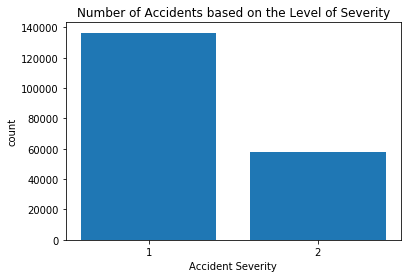

In [22]:
# distribution of accidents based on the severity code.
severity_code = ['1', '2']
pyplot.bar(severity_code, df_col['SEVERITYCODE'].value_counts())

plt.xlabel("Accident Severity")
plt.ylabel("count")
plt.title("Number of Accidents based on the Level of Severity")

In [23]:
# correlation between numerical data in the dataframe
df_col.corr()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000000,0.130949,0.246338,0.214218,-0.054686
PERSONCOUNT,0.130949,1.000000,-0.023464,-0.038809,0.380523
PEDCOUNT,0.246338,-0.023464,1.000000,-0.016920,-0.261285
PEDCYLCOUNT,0.214218,-0.038809,-0.016920,1.000000,-0.253773
VEHCOUNT,-0.054686,0.380523,-0.261285,-0.253773,1.000000


In [24]:
# make plot for each feature the distribution of samples on the feature.
def plot_feature(df, col):

    plt.figure(figsize = (14, 6))
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['SEVERITYCODE']
        df[col] = df[col].astype('category')
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')

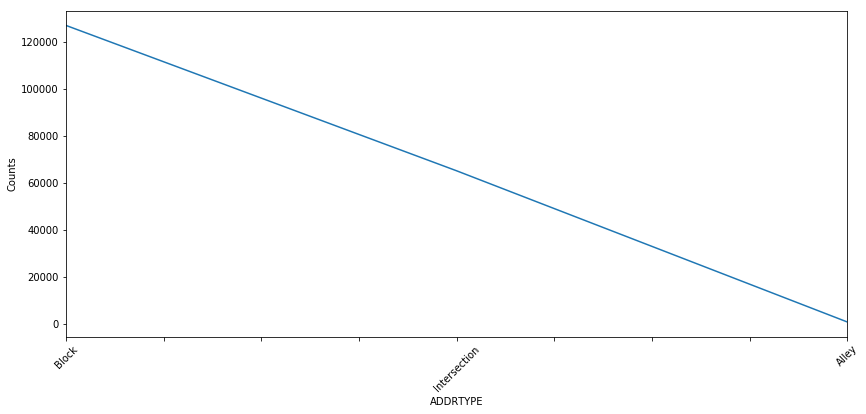

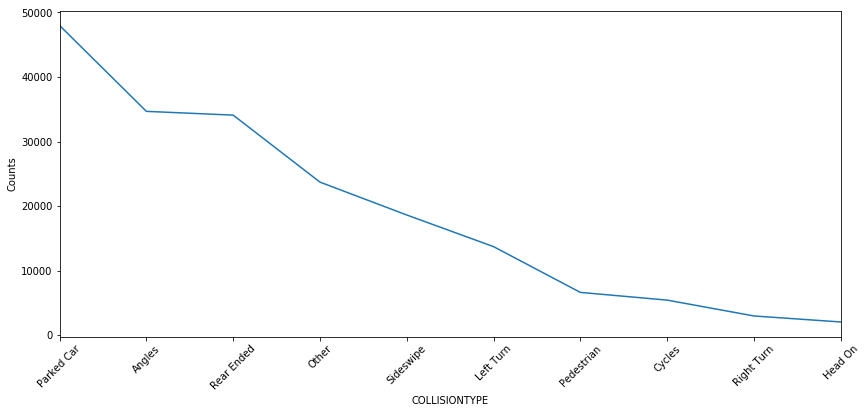

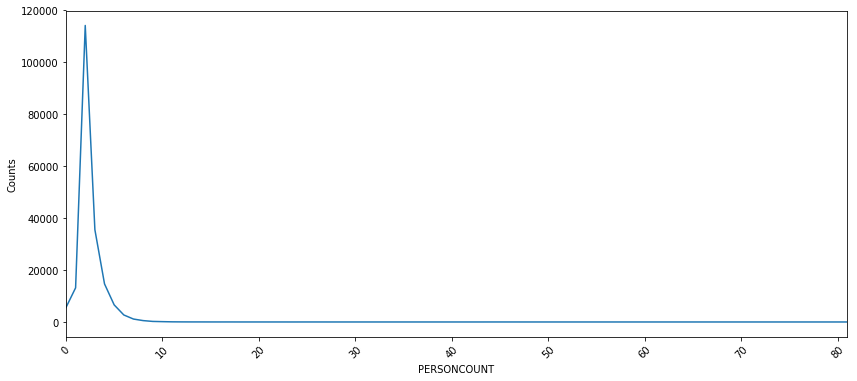

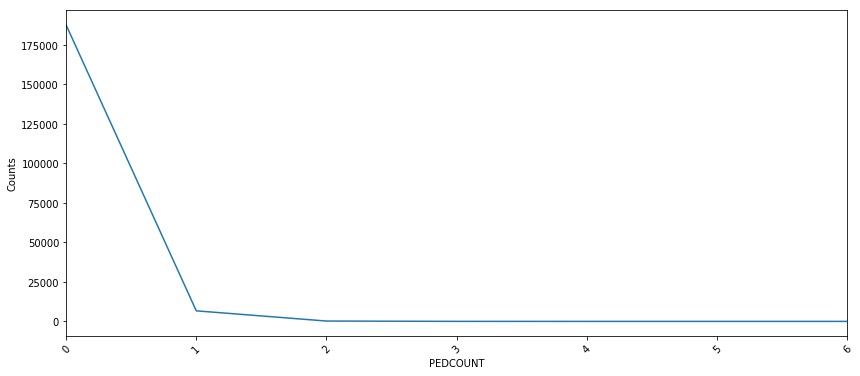

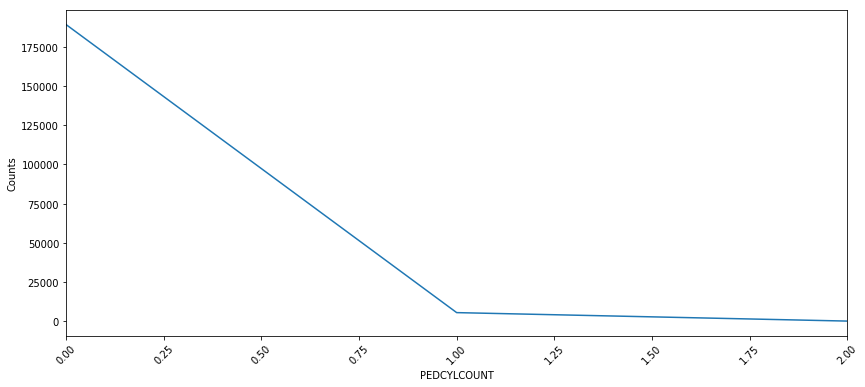

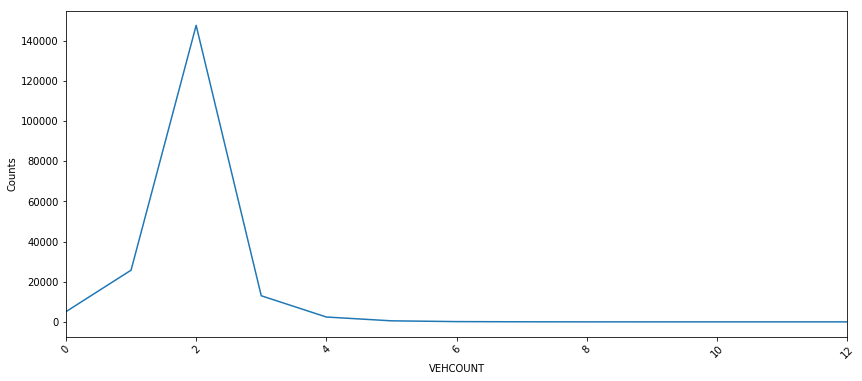

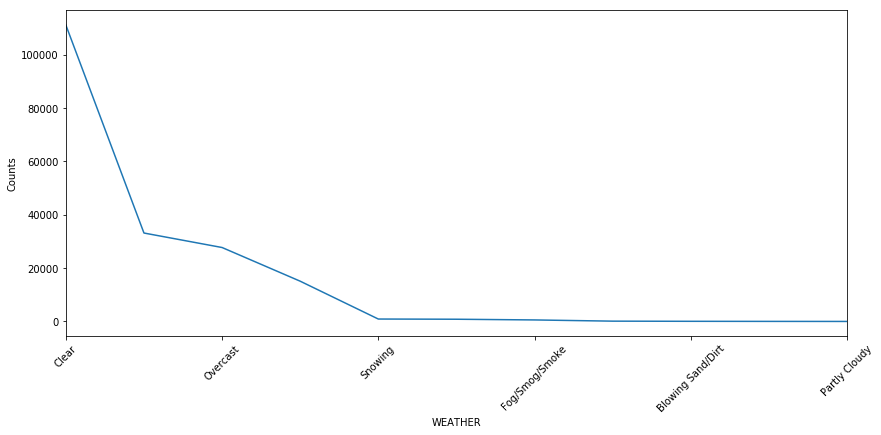

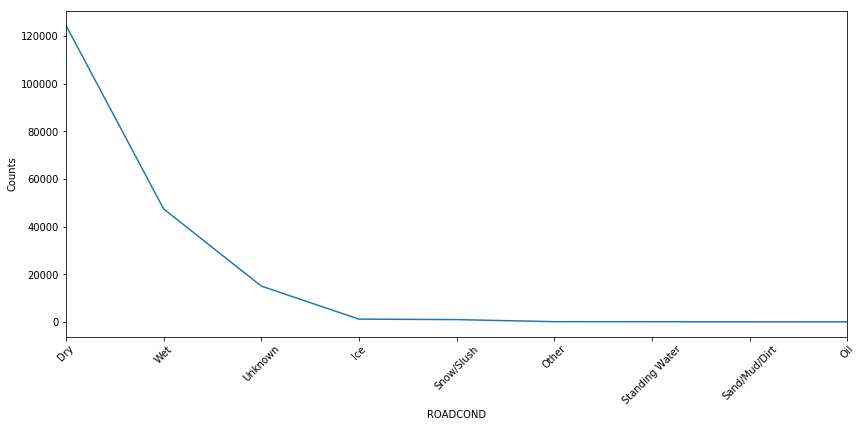

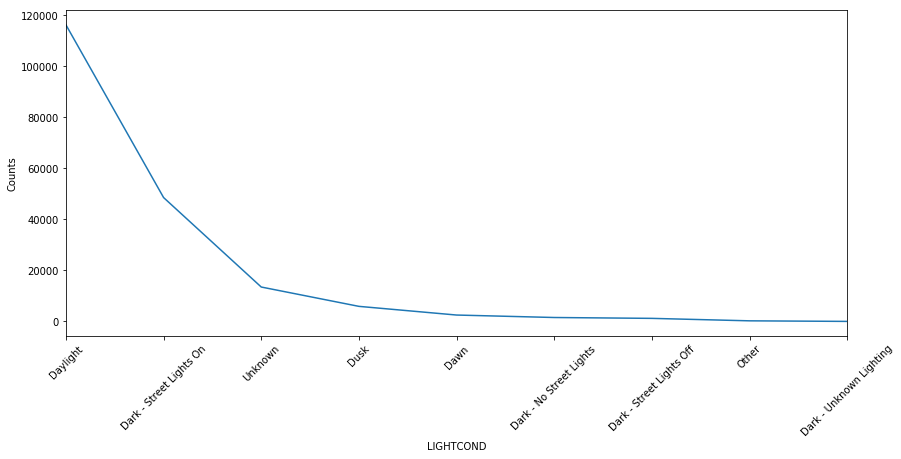

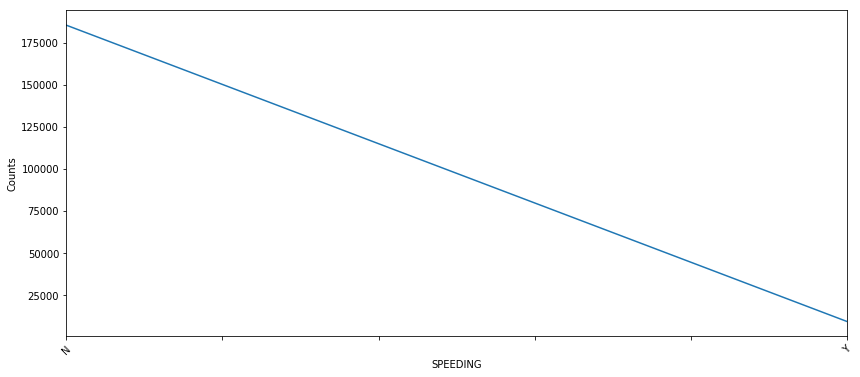

In [25]:
features = ['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']
for feature in features:
    plot_feature(df_col, feature)

In [26]:
filtered_missing_data = df_col.isnull()
for column in filtered_missing_data.columns.values.tolist():
    print(column)
    print (filtered_missing_data[column].value_counts())
    print("")  

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64



As seen above, some columns contain missing values, this could cause problems in modeling process. Based on the data set and fact that data are mostly categorical type, the missing values would be replaced by the most frequent value in each column.

In [27]:
# replacing missing values with the most frequent value in each column.
col = ['ADDRTYPE', 'COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
for at in col:
    df_col[at].replace(np.nan, df_col[at].value_counts().idxmax(), inplace=True)

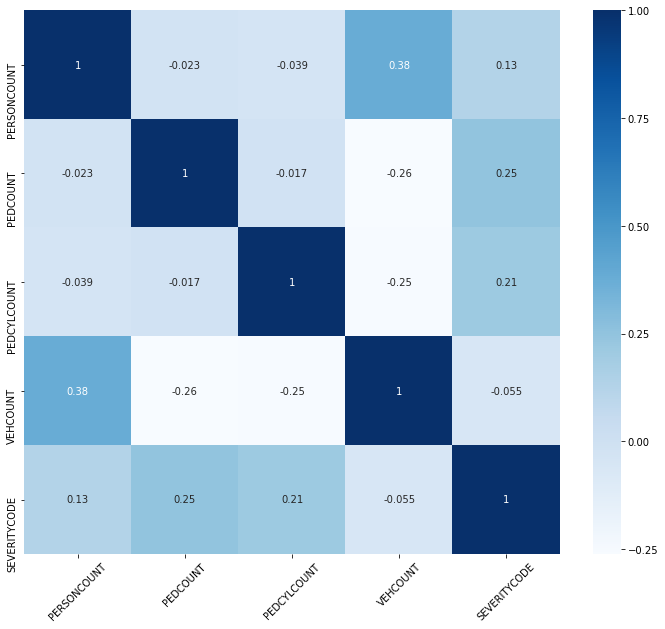

In [28]:
# heatmap showing the corelation between numerical values in the dataframe.
fig = plt.figure(figsize=(12, 10))
sns.heatmap(df_col[features + ['SEVERITYCODE']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

## Modeling

After careful evaluation of the dataset and better understanding the relationship between different features, it is the time to find the best predictive model. For this purpose, four different model would be applied on the data set and will be evaluated using various metrics to find the best option. 
First, it is required to use one hot encoding to convert categorical data to numerical values for modeling. Then, the train/test split is used on data which returns 4 different parameters. We will name them: X_trainset, X_testset, y_trainset, y_testset.

The train_test_split will need the parameters:
X, y, test_size=0.2, and random_state=4.

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [29]:
feature_df = df_col[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].apply(pd.to_numeric)

In [30]:
cat_to_num = pd.get_dummies(df_col[['ADDRTYPE', 'COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']])

In [31]:
model_features = pd.concat([feature_df,cat_to_num], axis=1)

In [32]:
X = model_features
X[0:5]

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,...,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,SPEEDING_N,SPEEDING_Y
0,2,0,0,2,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2,0,0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,4,0,0,3,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3,0,0,3,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2,0,0,2,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
y = df_col['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [34]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 48) (155738,)
Test set: (38935, 48) (38935,)


### *1. K Nearest Neighbor (KNN)*

In [35]:
# Modeling
# k = 12 seems to be the most efficient k value for the modeling based on the next code
from sklearn.neighbors import KNeighborsClassifier
k = 12
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [36]:
# just for sanity chaeck
knn_yhat = kNN_model.predict(X_test)
knn_yhat[0:5]

array([1, 1, 1, 2, 1])

In [37]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.6903814 , 0.72757159, 0.72387312, 0.74547322, 0.74054193,
       0.74804161, 0.74239116, 0.74953127, 0.74573006, 0.75181713,
       0.7423398 , 0.75253628, 0.7504302 , 0.75227944])

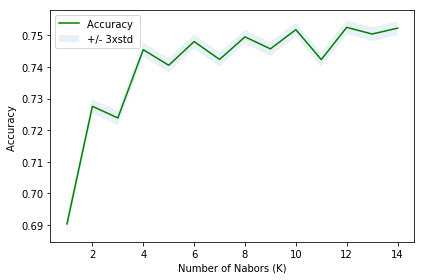

In [38]:
# k = 12 is used as the optimum value of k in the KNN modeling
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

### *2. Decision Tree*

In [39]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
DT_yhat = DT_model.predict(X_test)
DT_yhat

array([1, 1, 1, ..., 1, 1, 1])

### *3. Support Vector Machine*

In [41]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
SVM_yhat = SVM_model.predict(X_test)
SVM_yhat

array([1, 1, 1, ..., 1, 1, 1])

### *4. Logistic Regression*

In [43]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
LR_yhat = LR_model.predict(X_test)
LR_yhat

array([1, 1, 1, ..., 1, 1, 2])

In [52]:
LR_yhat_prob = LR_model.predict_proba(X_test)

## Model Evaluation

The models built can be evaluated using various metrics such as Jacard Similarity Score, f1 Score and Log Loss.

In [45]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [48]:
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.75
KNN F1-score: 0.72


In [49]:
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Jaccard index: 0.75
DT F1-score: 0.69


In [50]:
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.76
SVM F1-score: 0.71


In [53]:
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.76
LR F1-score: 0.72
LR LogLoss: 0.48



| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.75    | 0.72     | NA      |
| Decision Tree      | 0.75    | 0.69     | NA      |
| SVM                | 0.76    | 0.71     | NA      |
| LogisticRegression | 0.76    | 0.72     | 0.48    |


# Results

By looking at the evaluation results, we can see that most accidents are labeled as category “1” or less sever accidents. Results also show that most accidents happen at the block type address, however they are less severe than the accidents happening at intersections. Most accidents reported here did not involve speed violation. Also, number of pedestrian, cyclist, and persons involved in the accident have positive relationship with the severity level of the accident and all accidents have less than 10 people involved and mostly no pedestrian. Most collisions are labeled as parked car type and lastly, most accidents happen at clear weather and dry road condition during daylight hours.
All four models predicted the severity code for the test set with relatively high accuracy score. KNN and SVM algorithms required long computation time compared to the other two methods.

# Discussion

Four different algorithms were applied on the filtered data set  to find the most optimized predictive model for this data set. Data set was split into training and testing sets (80%, 20%) to compare the predicted data labels (severity code) with the recorded values. As shown here, all models have similar Jaccard accuracy values, but Decision Tree and Logistic Regression have comparatively less computation times and would be the optimum models for future predictions. 
Although some data columns were eliminated from the data set mostly due to high number of missing data, but the final attributes selected for the modeling seem to be the most relevant and reliable data. It would be recommended to collect additional data with less missing information as this could help improve the model accuracy. 
Author suggests using this model to predict a possibility of sever car accidents based on the time and location of driving and provide this information to the drivers. Having this information could help drivers choose the safest route for their travel and reduce the number of dangerous car accidents.

# Conclusion

According to this data set on collisions in Seattle from 2004 to the present, it is concluded that there is no particular relationship between bad weather, light and road conditions that affect collisions. It is observed that there were a lot more collisions that happened on dry roads and clear weather conditions during day time compared to when conditions were not ideal. This could mean that drivers tend to be more careful in driving in adverse weather, road and light conditions. The data shows that drivers are more likely to have a collision when weather conditions are good and roads are dry.